In [393]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation

from IPython.display import HTML
from random import random
from random import gauss

In [394]:
class point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def generate_points_around(x, y, r, n):
        points = []
        for i in range(n):
            while True:
                x_t = gauss(0, r) + x
                y_t = gauss(0, r) + y
                if (x - x_t)**2 + (y - y_t)**2 <= r**2:
                    points.append(point(x_t, y_t))
                    break
        return points

In [395]:
class cluster():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.points = []
    def improve_(self):
        x_mid = 0
        y_mid = 0
        for p in self.points:
            x_mid += p.x
            y_mid += p.y
        if len(self.points) != 0:
            x_mid /= len(self.points)
            y_mid /= len(self.points)
        self.x = x_mid
        self.y = y_mid


In [396]:
def rand_in_range(min, max):
    return min + (random() * (max - min))

In [397]:
def init_clusters(clusters, all_points):
    for c in clusters:
        c.points = []
    for p in all_points:
        min_dist = 999999.0
        min_clust = clusters[0]
        for c in clusters:
            dist = math.sqrt((p.x - c.x)**2 + (p.y - c.y)**2)
            if dist < min_dist:
                min_dist = dist
                min_clust = c
        min_clust.points.append(p)

In [398]:
in_one_group = 400
group_emount = 4
clusters_emount = 4
radius = 20

x_min = 0
x_max = 100
y_min = 0
y_max = 100

colors=["#0000FF", "#00FF00", "#FF0066", "#111111", "#555555", "#999999"]

In [399]:
all_points = []

for i in range(group_emount):
    new_points = point.generate_points_around(rand_in_range(x_min + radius, x_max - radius), rand_in_range(y_min + radius, y_max - radius), radius, in_one_group)
    all_points += new_points

# for i in range(in_one_group * group_emount):
#     all_points.append(point(rand_in_range(x_min, x_max), rand_in_range(y_min, y_max)))

In [400]:
clusters = []
for i in range(clusters_emount):
    c = cluster(rand_in_range(x_min, x_max), rand_in_range(y_min, y_max))
    clusters.append(c)

In [401]:
init_clusters(clusters, all_points)

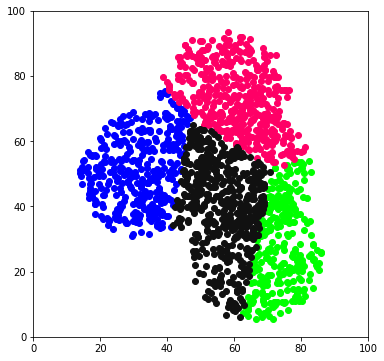

In [402]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))

for i in range(clusters_emount):
    ax.scatter([p.x for p in clusters[i].points], [p.y for p in clusters[i].points], color=colors[i])
plt.show()

In [403]:
# for i in range(300):
#     for c in clusters:
#         c.improve_()
#     init_clusters(clusters, all_points)

# fig = plt.figure(figsize=(6,6))
# ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))

# for i in range(clusters_emount):
#     ax.scatter([p.x for p in clusters[i].points], [p.y for p in clusters[i].points], color=colors[i])
# plt.show()

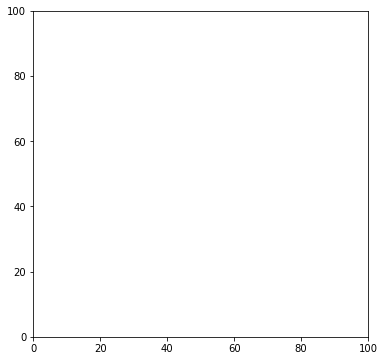

In [404]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])


def animate(i):
    for i in range(clusters_emount):
        plt.scatter([p.x for p in clusters[i].points],[p.y for p in clusters[i].points], color=colors[i])
    for c in clusters:
        c.improve_()
    init_clusters(clusters, all_points)
    return []

def init():
    return []

anim = animation.FuncAnimation(fig,animate,frames=30,interval=100,init_func=init,blit=False,repeat=0)
HTML(anim.to_jshtml())

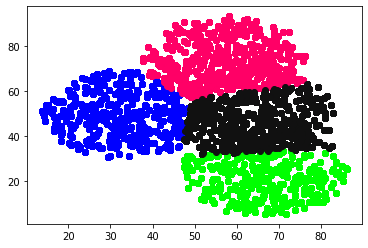

In [405]:
#anim.save('animation.gif', writer='imagemagick', fps=30)